In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [0]:
keras.backend.backend()

'tensorflow'

## **Collect data**

In [0]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

##**Normalize training data before training the neural net**



In [0]:
X_train = X_train.reshape(60000,28,28,1)

In [0]:
X_train = X_train/255

In [0]:
X_test = X_test.reshape(10000,28,28,1)

In [0]:
X_test = X_test/255

##**Now bulid Sequential Model and add Layers into it**



In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense ,Activation,Dropout, Conv2D,MaxPooling2D

model = Sequential() # here we choose sequencial model,there are other models also availble in documentation
model.add(Conv2D(32, (3,3), activation='relu',input_shape =(28,28,1)))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten()) # Flatten is converted 2D array in to 1D array
model.add(Dense(128,activation = 'relu')) # hidden layer with 100 neurons(It is base on try and error method to aassume neurons)
model.add(Dropout(0.3))
model.add(Dense(10,activation = 'softmax'))#activation Function is Softmax(Softmax is doing distributing set of number into just probabilities of your available classes )

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

## ***Compilation of model***

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
             metrics = ['accuracy'])

## **Fit the data in to model**

In [0]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_train, y_train))
score = model.evaluate(X_test, y_test, verbose=0)

W0802 10:53:40.968758 140045972879232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.8075 - acc: 0.6959 - val_loss: 0.4799 - val_acc: 0.8223
Epoch 2/50
60000/60000 [==============================] - 68s 1ms/step - loss: 0.4923 - acc: 0.8194 - val_loss: 0.3861 - val_acc: 0.8587
Epoch 3/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.4255 - acc: 0.8436 - val_loss: 0.3328 - val_acc: 0.8777
Epoch 4/50
60000/60000 [==============================] - 68s 1ms/step - loss: 0.3834 - acc: 0.8608 - val_loss: 0.3036 - val_acc: 0.8883
Epoch 5/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3554 - acc: 0.8697 - val_loss: 0.2795 - val_acc: 0.8974
Epoch 6/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3368 - acc: 0.8777 - val_loss: 0.2641 - val_acc: 0.9031
Epoch 7/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3162 - acc: 0.8855 - val_loss: 0.2527 - val_acc

In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2110784000277519
Test accuracy: 0.9226


## **Above shows accuracy score of 82.76%.The first parameter is loss**

ValueError: ignored

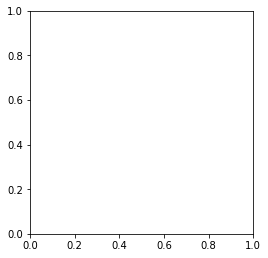

In [0]:
plt.matshow(X_test[1])

In [0]:
y_predict = model.predict(X_test)

In [0]:
np.argmax(y_predict[0])

9

In [0]:

class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [0]:
class_labels[np.argmax(y_predict[0])]

'Ankle boot'

# Ploting training and validation accuracy as well as loss.

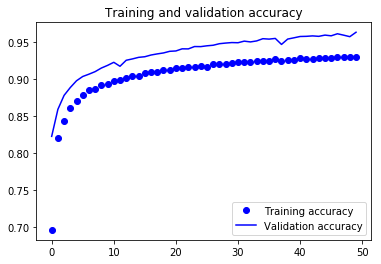

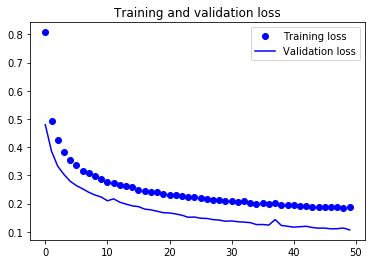

In [0]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label= 'Validation loss')
plt.title('Training and validation loss')                            
plt.legend()
plt.show()
